In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model import Net
from preprocessing import Create_Matrix, StandardScaler, Split

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [2]:
timesteps = 90
start = 100
end = 90

In [3]:
df = pd.read_csv('bdi.csv')
df.fillna(method='ffill', inplace=True)
data = df['bdi'].values

In [4]:
x, y = Create_Matrix(data, timesteps)
x_train, y_train, x_val, y_val, x_test, y_test = Split(x, y)

In [5]:
scaler = StandardScaler(y_train)
x_test = scaler.transform(x_test)
x_test = torch.FloatTensor(x_test).to(device)

In [6]:
x_test = x_test[start].reshape(-1, 1)

In [7]:
ls = []
model = Net().to(device)
model = torch.load(f'checkpoint.pt')
for _ in range(end):
    tmp = x_test[-timesteps:]
    model.eval()
    with torch.no_grad():
        tmp = tmp[-timesteps:]
        pred = model(tmp.view(1, timesteps, 1))
    ls.append(pred.cpu().numpy())
    x_test = torch.cat((x_test, pred))

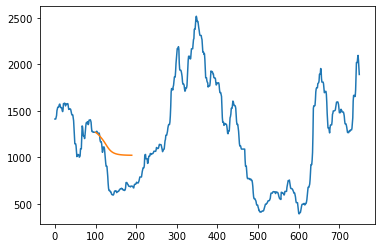

In [8]:
pred = scaler.inverse_transform(np.array(ls).reshape(-1))
plt.plot(y_test)
plt.plot(range(start, start+end), pred)
plt.show()